In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('\content\drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgkXwx35TxOXme_nD9tCBjV9tdpDzabO6fUDxlvoQza_26rxekoT1Q


TIMEOUT: ignored

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/contentdrive/MyDrive/Colab Notebooks/heart.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

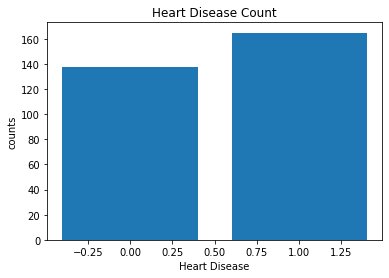

In [ ]:
y = heart_data.target.value_counts()
x = [1,0]
plt.bar(x,y)
plt.ylabel('counts')
plt.xlabel('Heart Disease')
plt.title("Heart Disease Count")
plt.show()

1 --> Defective Heart

0 --> Healthy Heart

Analyze the data with different diagrams

In [ ]:
categorical_val = []
continous_val = []
for column in heart_data.columns:
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

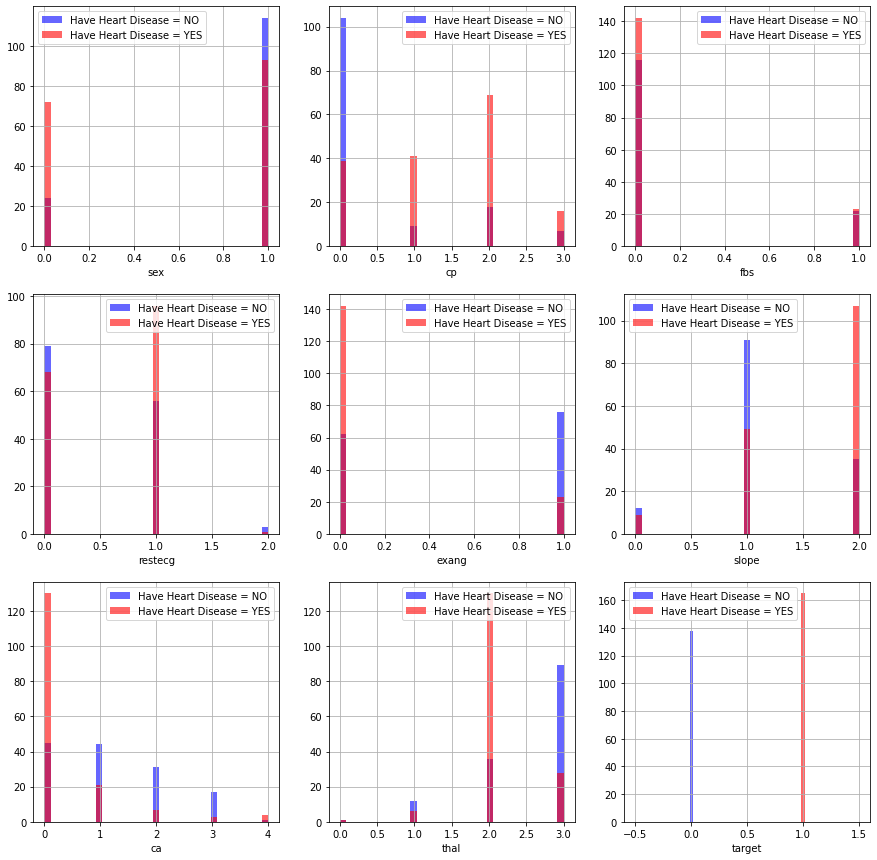

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

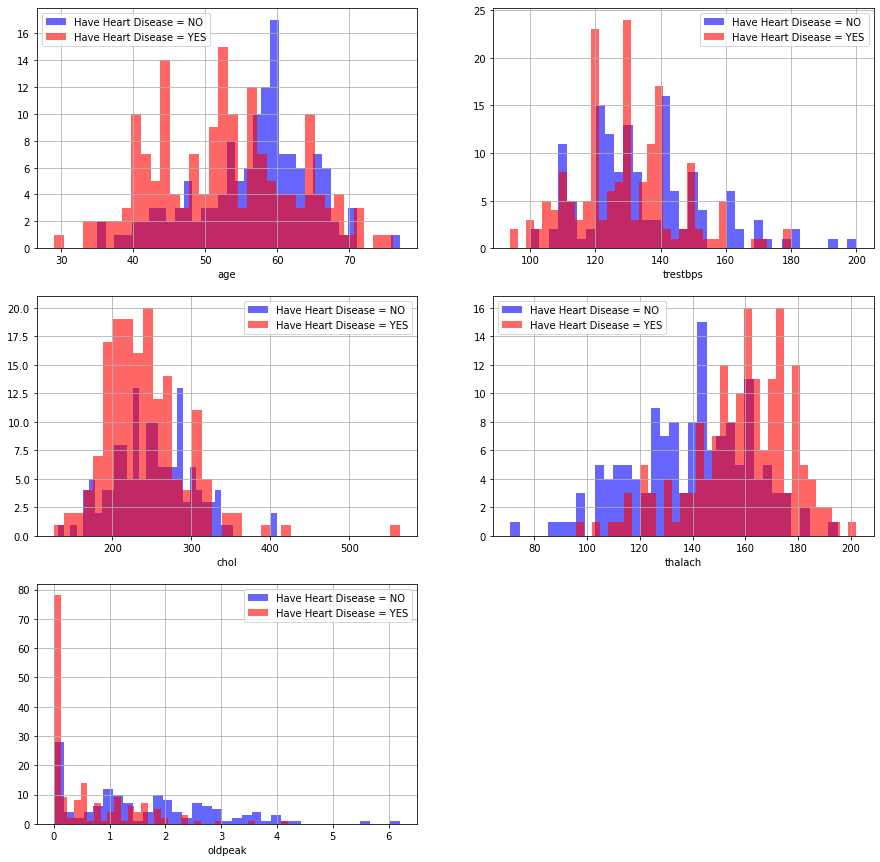

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Age vs. Max Heart Rate for Heart Disease


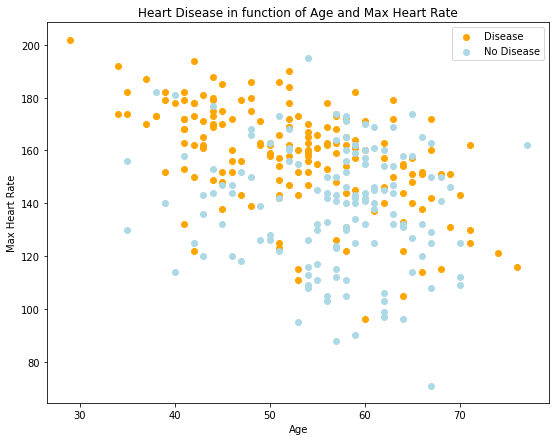

In [ ]:
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(heart_data.age[heart_data.target==1],heart_data.thalach[heart_data.target==1], c="orange")

# Scatter with negative examples
plt.scatter(heart_data.age[heart_data.target==0],heart_data.thalach[heart_data.target==0], c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
labels = ["Disease","No Disease"]
m = (heart_data.age[heart_data.target==1])
print(m)

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64


**Splitting the Features and Target**

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


Building a Predictive System

In [ ]:
input_data = (66,0,3,150,226,0,1,114,0,2.6,0,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease. They can consult the doctor for better Treatment')

[1]
The Person has Heart Disease. They can consult the doctor for better Treatment


In [ ]:
doctor = pd.read_csv('/content/contentdrive/MyDrive/Colab Notebooks/Doctor List - Sheet1.csv')

In [ ]:
print(doctor)

    S.No                 Name  Department   ...       City      State Country
0      1        Sanjeev Kumar   Cardiology  ...  Hyderabad  Telangana   India
1      2           Ravi Kumar   Cardiology  ...  Hyderabad  Telangana   India
2      3         Shyam Sunder   Cardiology  ...  Hyderabad  Telangana   India
3      4  Ajith Kumar Patnaik   Cardiology  ...  Hyderabad  Telangana   India
4      5          Pavan Kumar   Cardiology  ...  Hyderabad  Telangana   India
5      6       Sambashiva Rao   Cardiology  ...  Hyderabad  Telangana   India
6      7           Sashikanth   Cardiology  ...  Hyderabad  Telangana   India
7      8       Pramod Kumar K   Cardiology  ...  Hyderabad  Telangana   India
8      9           Rajasekhar   Cardiology  ...  Hyderabad  Telangana   India
9     10     Uday Kumar Hosad   Cardiology  ...  Hyderabad  Telangana   India
10    11     Krishna Malkonda   Cardiology  ...  Hyderabad  Telangana   India
11    12            Syed Imam   Cardiology  ...  Hyderabad  Tela

In [ ]:
doctor.head()

,S.No,Name,Department,Study,Fees,Name of Hospital,Location,City,State,Country
0,1,Sanjeev Kumar,Cardiology,"MBBS, MD, DM (Cardiology)\n\n",700,Sunshine,Gachibowli,Hyderabad,Telangana,India
1,2,Ravi Kumar,Cardiology,"MBBS, MD, DM (Cardiology)\n\n",700,Sunshine,Gachibowli,Hyderabad,Telangana,India
2,3,Shyam Sunder,Cardiology,"MBBS, MD, DM (Cardiology)\n\n",700,Sunshine,Gachibowli,Hyderabad,Telangana,India
3,4,Ajith Kumar Patnaik,Cardiology,"MBBS, MD, DM (Cardiology)\n\n",700,Sunshine,Gachibowli,Hyderabad,Telangana,India
4,5,Pavan Kumar,Cardiology,"MBBS, MD, DM (Cardiology)\n\n",700,Sunshine,Gachibowli,Hyderabad,Telangana,India


In [ ]:
doctor.tail()

,S.No,Name,Department,Study,Fees,Name of Hospital,Location,City,State,Country
7,8,Pramod Kumar K,Cardiology,"MD, DM (Cardiology),",500,Yashoda,Somajiguda,Hyderabad,Telangana,India
8,9,Rajasekhar,Cardiology,"MD, DM (Cardiology),",500,Yashoda,Secunderabad,Hyderabad,Telangana,India
9,10,Uday Kumar Hosad,Cardiology,"MD, DM (Cardiology),",500,Yashoda,Secunderabad,Hyderabad,Telangana,India
10,11,Krishna Malkonda,Cardiology,"MD, DM (Cardiology),",200,Osmania General Hospital,Secunderabad,Hyderabad,Telangana,India
11,12,Syed Imam,Cardiology,"MD, DM (Cardiology),",200,Osmania General Hospital,Secunderabad,Hyderabad,Telangana,India
